In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
terr_data=pd.read_csv("globalterrorism.csv",encoding = "ISO-8859-1",low_memory=False)

In [31]:
terr_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [32]:
terr_data.shape

(181691, 135)

In [33]:
terr_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [34]:
terr_data.rename(columns ={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terr_data.head(1)

,eventid,year,month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [35]:
terr_data=terr_data[['year','month','day','Country','state','Region','AttackType','Target','Killed','Wounded','Summary','Group','Target_type','Weapon_type','Motive']]

In [36]:
terr_data.head()

,year,month,day,Country,state,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [37]:
terr_data.describe()

,year,month,day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


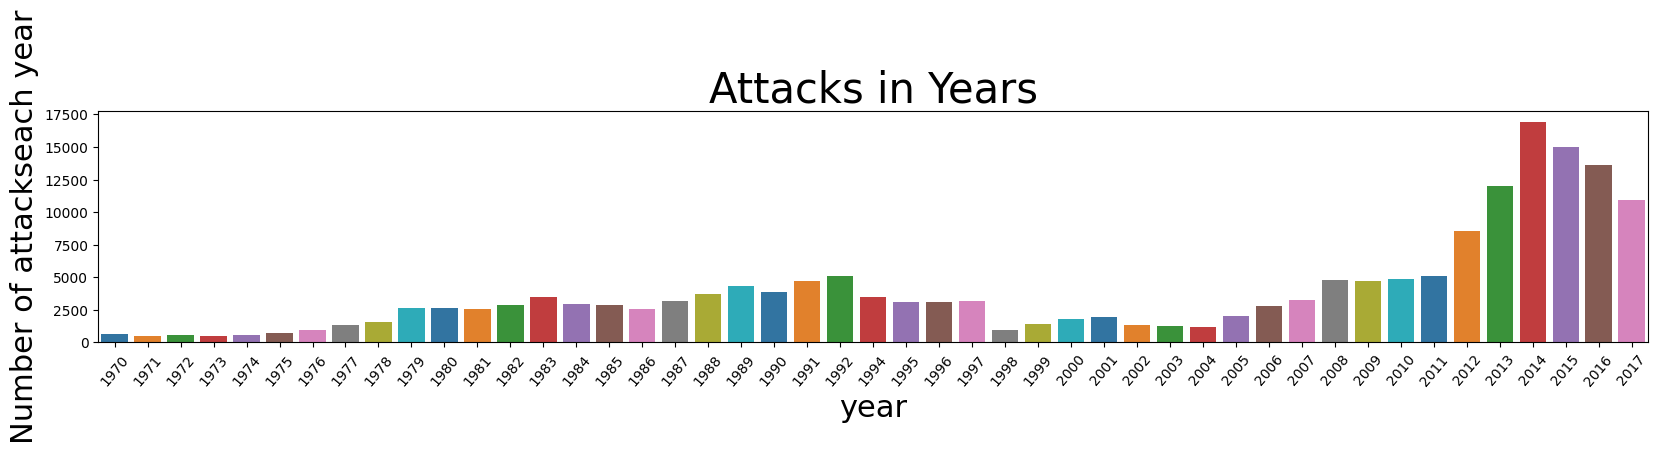

In [38]:
Year=terr_data['year'].unique()
years_count = terr_data['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,3))
sns.barplot(x=Year,y=years_count,palette="tab10")
plt.xticks(rotation=50)
plt.xlabel('year',fontsize=22)
plt.ylabel("Number of attackseach year",fontsize=22)
plt.title("Attacks in Years",fontsize=30)
plt.show()

Text(0.5, 0, 'year')

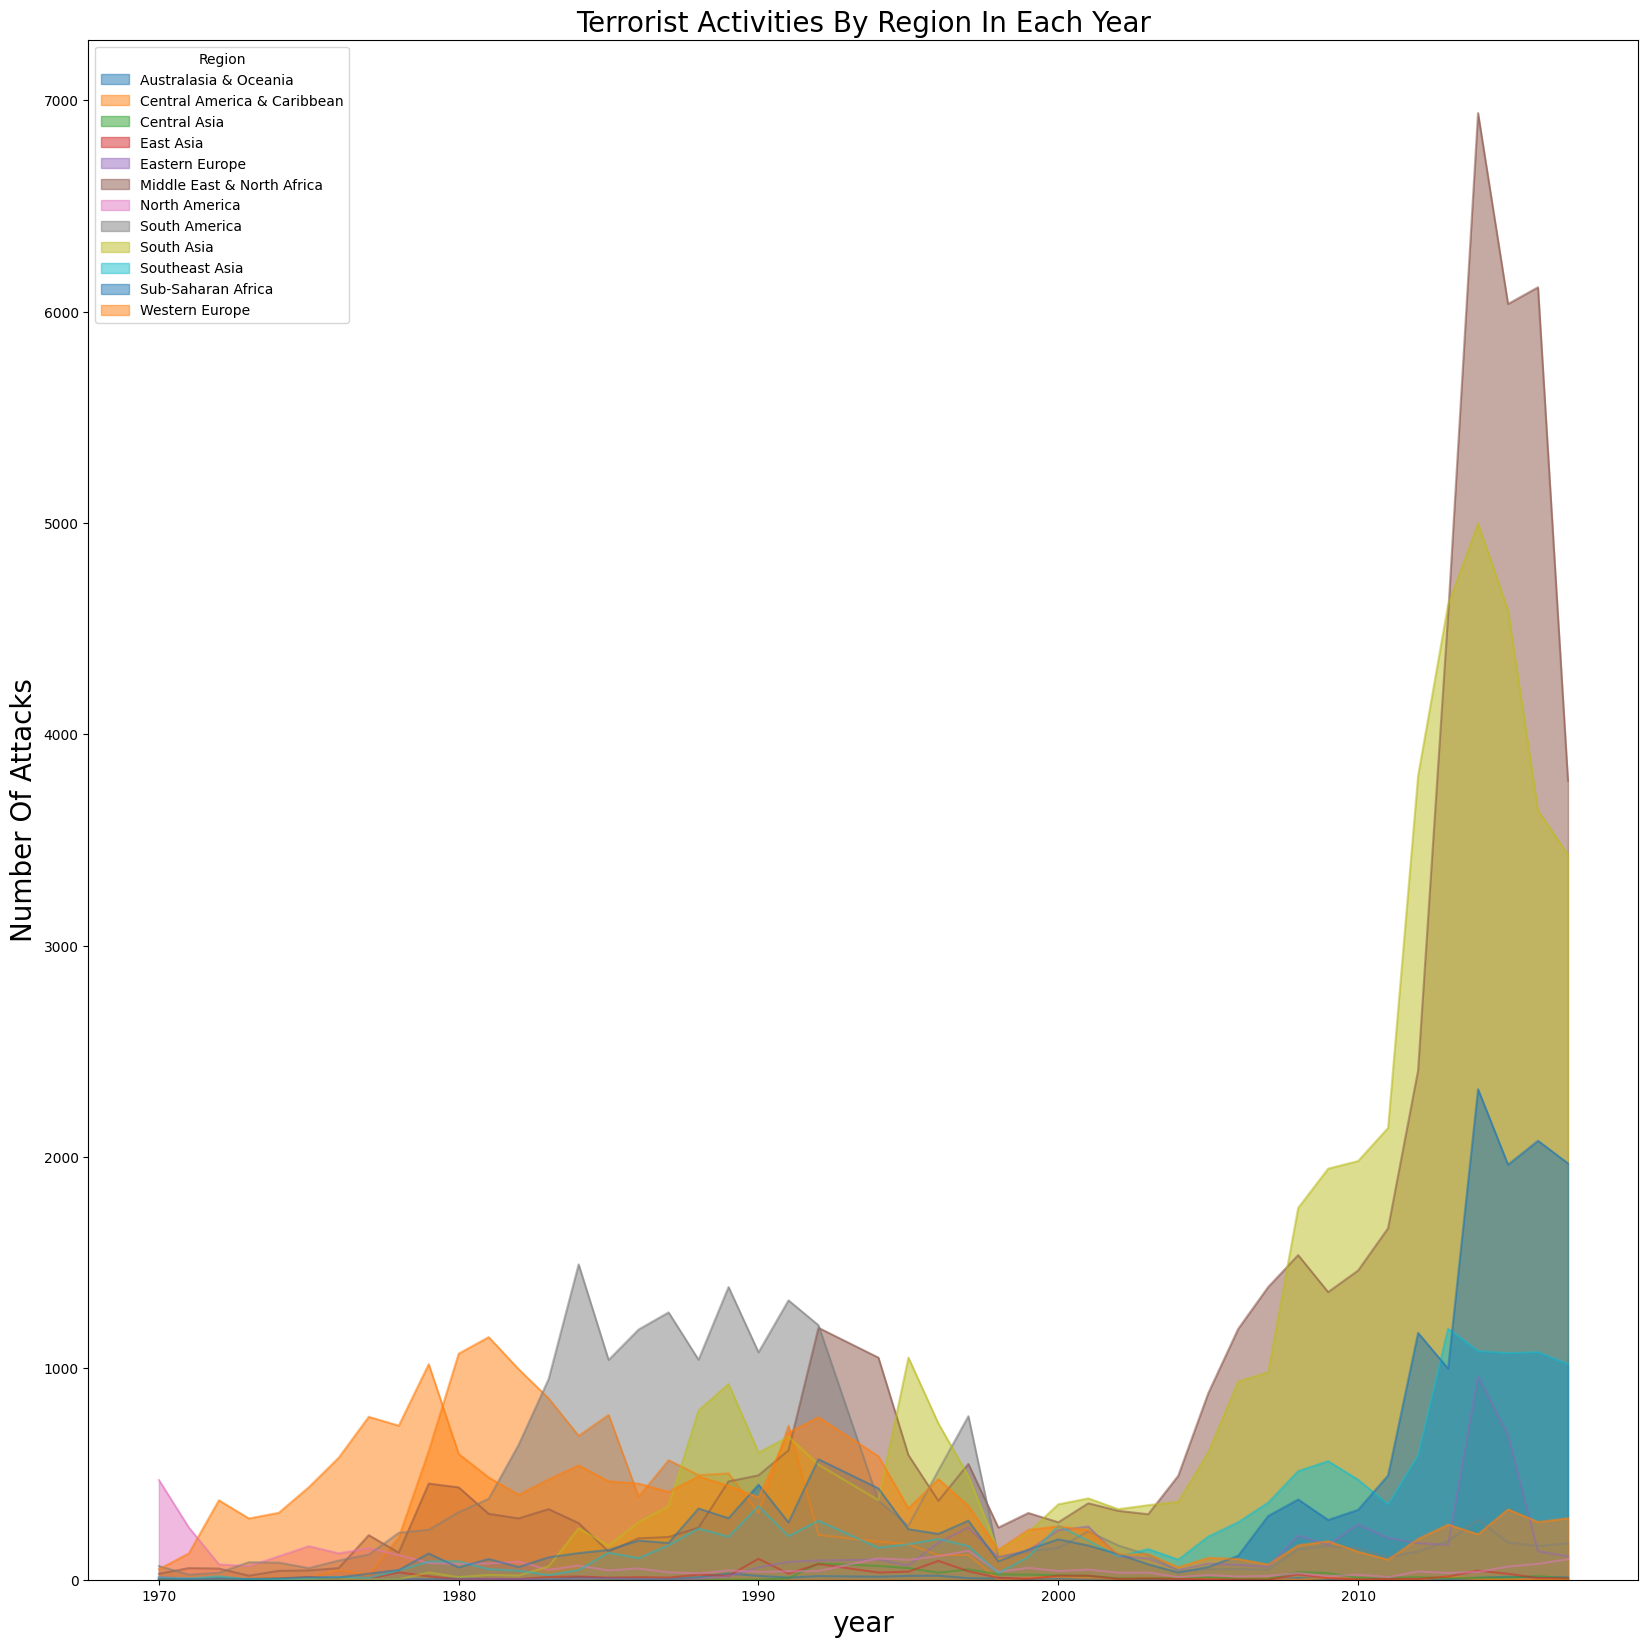

In [39]:
pd.crosstab(terr_data.year,terr_data.Region).plot(kind='area',stacked=False,figsize=(20,20))
plt.title("Terrorist Activities By Region In Each Year",fontsize =20)
plt.ylabel("Number Of Attacks",fontsize=20)
plt.xlabel("year",fontsize=20)

C:\Users\Rahul\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


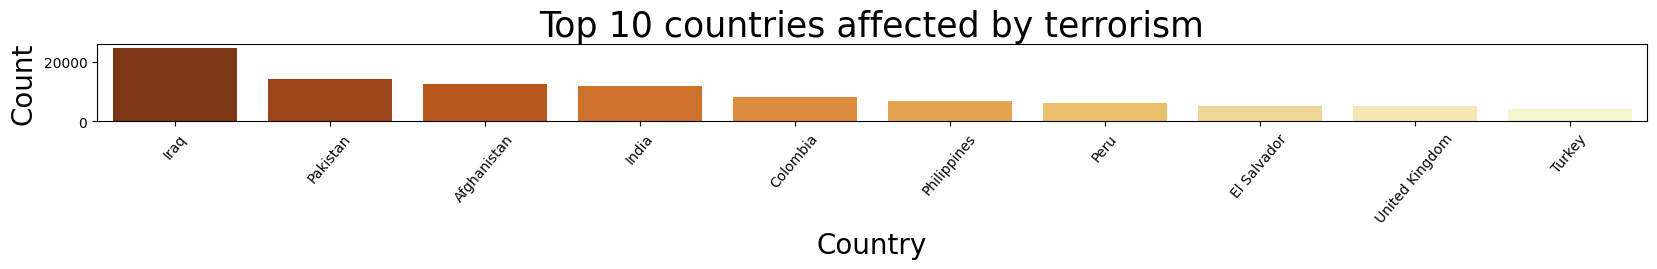

In [40]:
plt.subplots(figsize=(20,1))
sns.barplot(terr_data['Country'].value_counts()[:10].index,terr_data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top 10 countries affected by terrorism',fontsize=25)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation = 50)
plt.show()

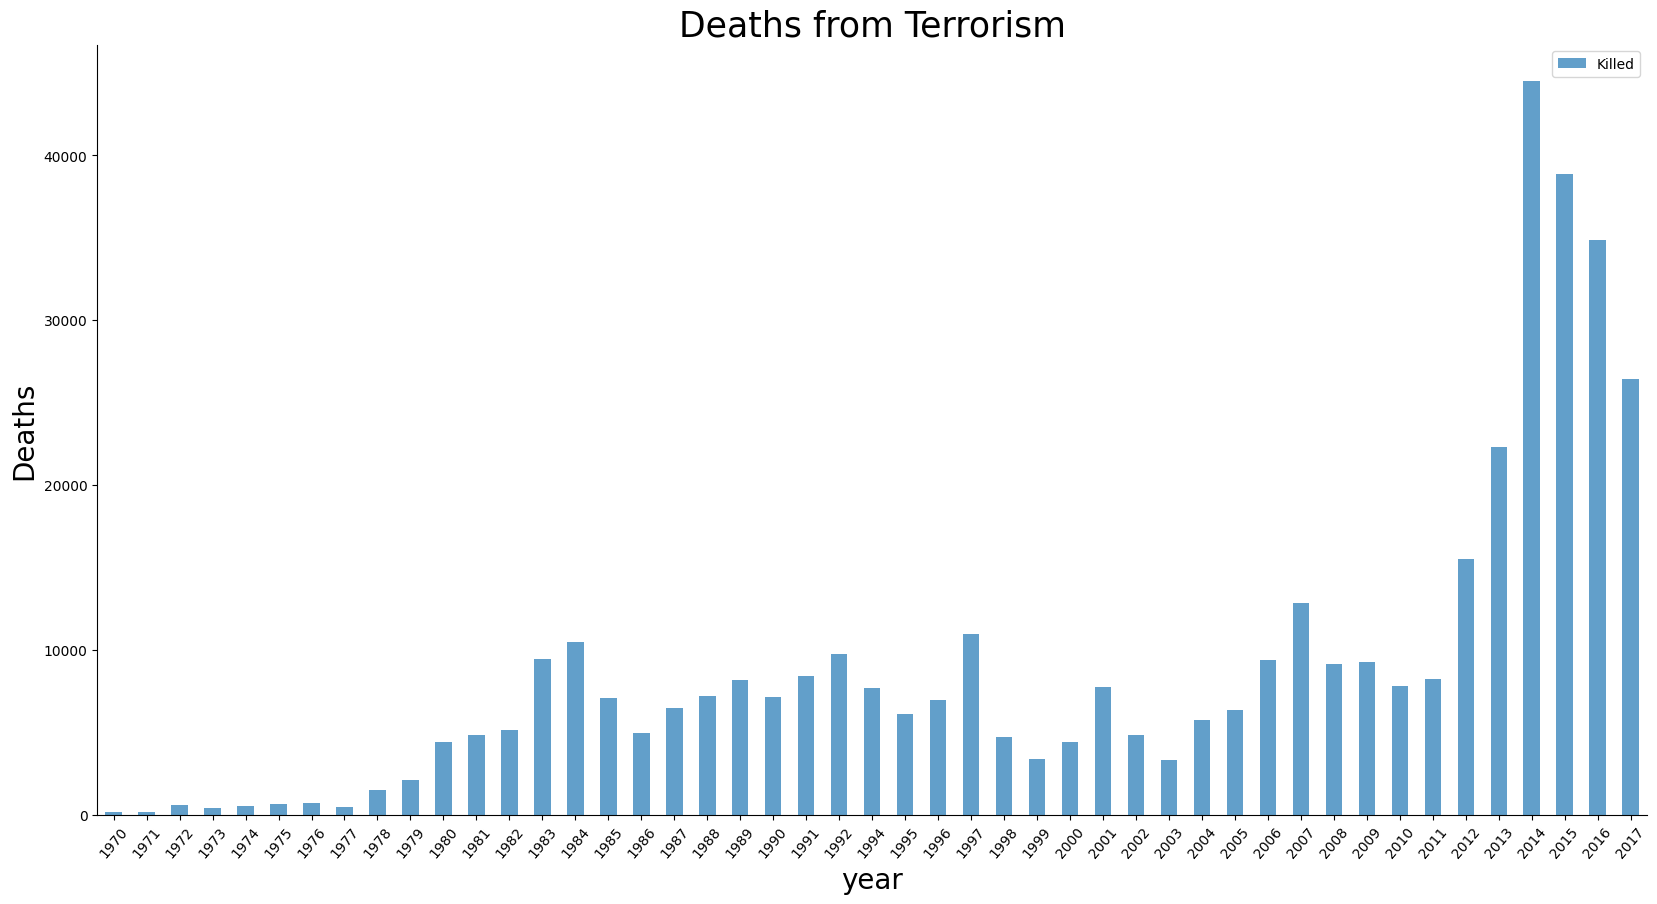

In [52]:
data=terr_data[['year','Killed']].groupby(['year']).sum()
fig, ax4 =plt.subplots(figsize=(20,10))
data.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title("Deaths from Terrorism",fontsize=25)
plt.ylabel('Deaths',fontsize=20)
plt.xlabel('year',fontsize=20)
top_side=ax4.spines["top"]
top_side.set_visible(False)
right_side=ax4.spines["right"]
right_side.set_visible(False)

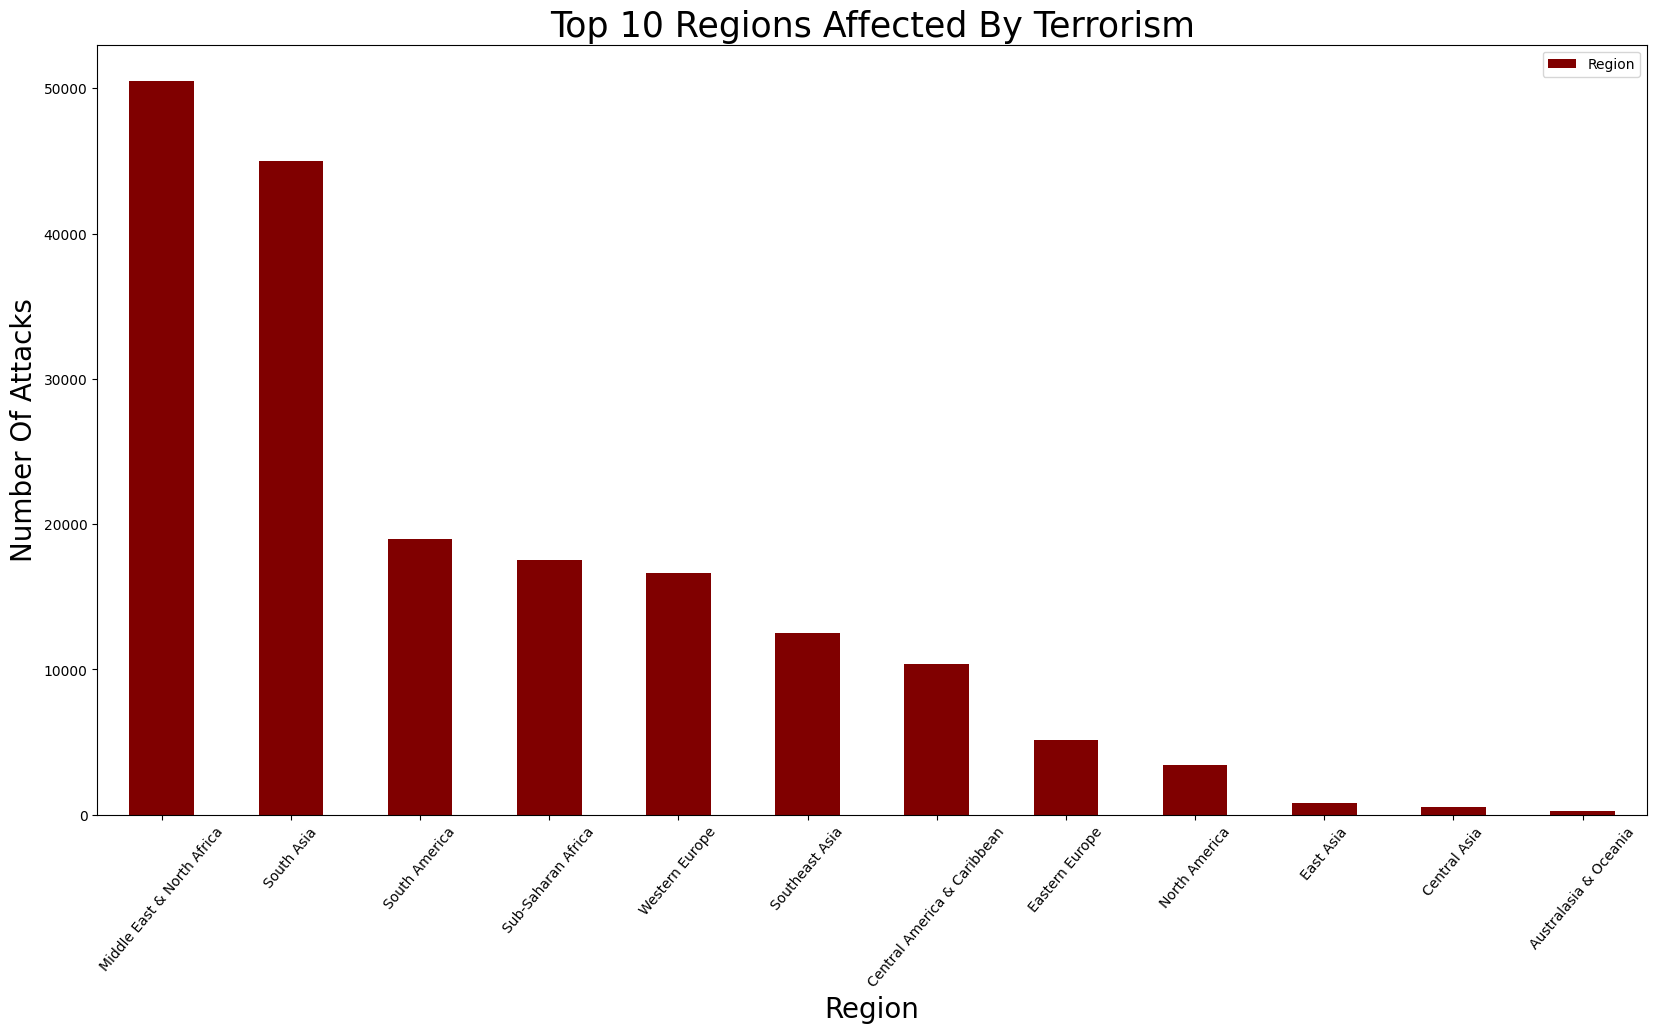

In [53]:
terr_data['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(15).plot(kind='bar',figsize=(20,10),color='maroon')
plt.xticks(rotation =50)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Number Of Attacks',fontsize=20)
plt.title("Top 10 Regions Affected By Terrorism",fontsize=25)
plt.show()

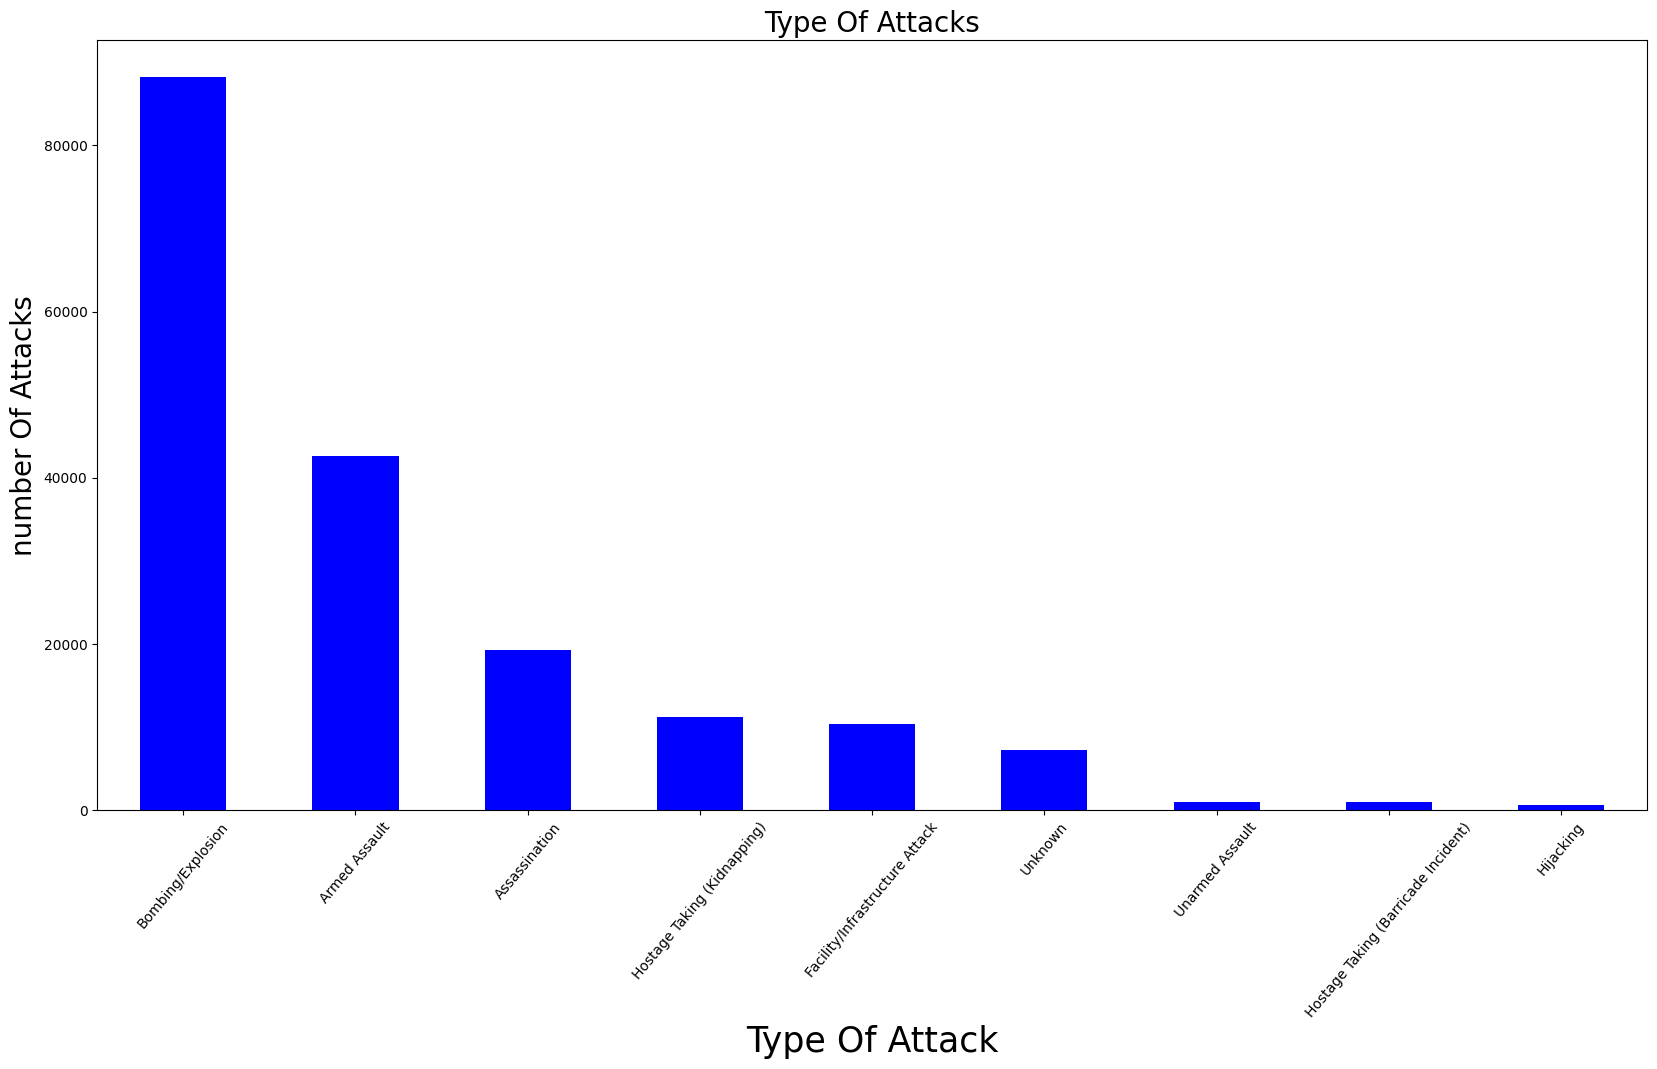

In [55]:
terr_data['AttackType'].value_counts().plot(kind='bar',figsize=(20,10),color='Blue')
plt.xticks(rotation=50)
plt.xlabel("Type Of Attack",fontsize=25)
plt.ylabel("number Of Attacks",fontsize=20)
plt.title("Type Of Attacks",fontsize=20)
plt.show()

In [58]:
data=terr_data[['Group','Country','Killed']]
data=data.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
data

C:\Users\Rahul\AppData\Local\Temp\ipykernel_15460\2122483444.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data=data.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)


,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [60]:
Kill=terr_data.loc[:,'Killed']
print('Number of People Killed In Terrorist Attacks:',int(sum(Kill.dropna())))

Number of People Killed In Terrorist Attacks: 411868


In [61]:
typekill=terr_data.pivot_table(columns='AttackType',values='Killed',aggfunc='sum')
typekill

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [62]:
countrykill=terr_data.pivot_table(columns='Country',values='Killed',aggfunc='sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
